In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform


Using TensorFlow backend.


In [2]:
import pandas as pd
df=pd.read_csv("ad_org_train.csv")

In [3]:
df.head(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,D
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,D
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,E
8,VID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,F
9,VID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,B


In [4]:
df1=pd.read_csv("ad_org_test.csv")

In [5]:
d2 = df.copy()
d2=d2.drop(['vidid'], axis=1)
d6 = df1.copy()
d7=d6.drop(['vidid'], axis=1)

In [6]:
d2.head(10)

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,1,666,1,0,0,2016-06-29,PT31S,D
5,4,78,0,0,0,2016-05-09,PT15S,D
6,40621,43118,15,1,0,2015-08-21,PT3M20S,D
7,1,14205,55,16,1,2016-08-01,PT58S,E
8,1,526015,3064,211,2582,2015-11-06,PT27M50S,F
9,1,406992,3831,310,7839,2016-10-03,PT11M19S,B


## Missing value analysis

In [7]:
missing_val=pd.DataFrame(d2.isnull().sum())
missing_val1=pd.DataFrame(d7.isnull().sum())

In [8]:
missing_val1

,0
views,0
likes,0
dislikes,0
comment,0
published,0
duration,0
category,0


In [9]:
missing_val

,0
adview,0
views,0
likes,0
dislikes,0
comment,0
published,0
duration,0
category,0


In [10]:
missing_val1=pd.DataFrame(d2.isnull().sum())

In [11]:
d2['duration'] = d2['duration'].map(lambda x: x.lstrip('PT').rstrip('aAbBcC'))
d7['duration'] = d7['duration'].map(lambda x: x.lstrip('PT').rstrip('aAbBcC'))

In [12]:
d2['duration'] = pd.to_timedelta(d2['duration'])
d7['duration'] = pd.to_timedelta(d7['duration'])

In [13]:
d2['duration'] = d2['duration'].dt.total_seconds()
d7['duration'] = d7['duration'].dt.total_seconds()

In [14]:
cnames=['adview','views','likes','dislikes','comment']

In [15]:
for i in cnames:
    d2[i] = d2[i].convert_objects(convert_numeric=True)
cnames=['views','likes','dislikes','comment']
for i in cnames:
    d7[i] = d7[i].convert_objects(convert_numeric=True)

/home/satish/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/home/satish/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [16]:
d2=d2.drop(['published'],axis=1)
d7=d7.drop(['published'],axis=1)

In [17]:
for col_name in d2.columns:
    if(d2[col_name].dtype == 'object'):
        d2[col_name]= d2[col_name].astype('category')
        d2[col_name] = d2[col_name].cat.codes

In [18]:
for col_name in d7.columns:
    if(d7[col_name].dtype == 'object'):
        d7[col_name]= d7[col_name].astype('category')
        d7[col_name] = d7[col_name].cat.codes

In [19]:
cnames=['views','likes','dislikes','comment','category','duration']

## Correlation Analysis

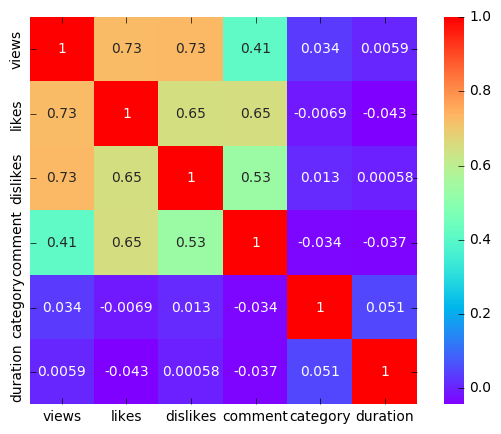

In [20]:
df_corr = d2.loc[:,cnames]
%matplotlib inline
#correlation analysis
#set height and width of plot
f , ax = plt.subplots(figsize = (7,5))
#generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='rainbow',annot=True,square=True, ax=ax)

In [21]:
cnames=['views','likes','dislikes','comment','category','duration']

## Outlier Analysis

In [22]:
for i in cnames:
    #Detect and replace with NA
    #Extract quartiles
    q75, q25 = np.percentile(d2.loc[:,i], [75 ,25])

    #Calculate IQR
    iqr = q75 - q25

    #Calculate inner and outer fence
    mini = q25 - (iqr*1.5)
    maxi = q75 + (iqr*1.5)

    #Replace with NA
    d2.loc[d2.loc[:,i] < mini,:i] = np.nan
    d2.loc[d2.loc[:,i] > maxi,:i] = np.nan

/home/satish/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [23]:
cnames=['views','likes','dislikes','comment','category','duration']
for i in cnames:
    #Detect and replace with NA
    #Extract quartiles
    q75, q25 = np.percentile(d7.loc[:,i], [75 ,25])

    #Calculate IQR
    iqr = q75 - q25

    #Calculate inner and outer fence
    mini = q25 - (iqr*1.5)
    maxi = q75 + (iqr*1.5)

    #Replace with NA
    d7.loc[d7.loc[:,i] < mini,:i] = np.nan
    d7.loc[d7.loc[:,i] > maxi,:i] = np.nan

In [24]:
missing_val=pd.DataFrame(d2.isnull().sum())

In [25]:
missing_val

,0
adview,2123
views,2125
likes,2250
dislikes,2250
comment,2292
duration,2123
category,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
vidid        14999 non-null object
adview       14999 non-null int64
views        14999 non-null object
likes        14999 non-null object
dislikes     14999 non-null object
comment      14999 non-null object
published    14999 non-null object
duration     14999 non-null object
category     14999 non-null object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [27]:
cnames=['views','likes','dislikes','comment','category','duration','adview']
for i in cnames:
    d2[i] = d2[i].fillna(d2[i].median())
    
cnames=['views','likes','dislikes','comment','category','duration']
for i in cnames:
    d7[i] = d7[i].fillna(d7[i].median())
        

In [28]:
missing_val=pd.DataFrame(d2.isnull().sum())

In [29]:
missing_val

,0
adview,0
views,0
likes,0
dislikes,0
comment,0
duration,0
category,0


In [30]:
d7.head(4)

,views,likes,dislikes,comment,duration,category
0,440238.0,6153.0,218.0,1377.0,449.0,1.0
1,1040132.0,8171.0,340.0,1047.0,389.0,5.0
2,144099.0,451.0,34.0,46.0,285.0,3.0
3,1316715.0,2284.0,250.0,274.0,595.0,6.0


In [31]:
d2 = d2[['views','likes','dislikes','comment','category','duration','adview']]

In [32]:
d2.head(10)

,views,likes,dislikes,comment,category,duration,adview
0,1031602.0,8523.0,363.0,1095.0,5.0,457.0,40.0
1,1707.0,56.0,2.0,6.0,3.0,570.0,2.0
2,2023.0,25.0,0.0,2.0,2.0,136.0,1.0
3,620860.0,777.0,161.0,153.0,7.0,262.0,6.0
4,666.0,1.0,0.0,0.0,3.0,31.0,1.0
5,78.0,0.0,0.0,0.0,3.0,15.0,4.0
6,43118.0,15.0,1.0,0.0,3.0,200.0,40621.0
7,14205.0,55.0,16.0,1.0,4.0,58.0,1.0
8,148147.0,454.0,34.0,43.0,5.0,278.0,2.0
9,406992.0,3831.0,310.0,7839.0,1.0,679.0,1.0


In [33]:
cnames=['views','likes','dislikes','comment','category','duration','adview']

In [34]:
#normalization
for i in cnames:
    d2[i]=(d2[i]-min(d2[i]))/(max(d2[i])-min(d2[i]))

In [35]:
#g=d2['adview'].max(),h=d2['adview'].min()

In [36]:
names=['views','likes','dislikes','comment','category','duration']
#normalization
for i in names:
    d7[i]=(d7[i]-min(d7[i]))/(max(d7[i])-min(d7[i]))

In [37]:
missing_val1=pd.DataFrame(d7.isnull().sum())
missing_val1

,0
views,0
likes,0
dislikes,0
comment,0
duration,0
category,0


## Decision tree

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [39]:
#divide data into train and test
train,test=train_test_split(d2,test_size=0.3)

In [40]:
#Decision tree for regresion
fit=DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:6],train.iloc[:,6])

In [41]:
#apply model on the test data
prediction_DT=fit.predict(test.iloc[:,0:6])

In [42]:
actual=test['adview']
predicted=pd.DataFrame(prediction_DT)
actual=pd.DataFrame(actual)

In [43]:
predicted["predicted"]=pd.DataFrame(prediction_DT)

In [44]:
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val

In [45]:
rmse(predicted["predicted"],actual["adview"])

0.008657206787857991

## Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score

X = d2.drop(['adview'],axis=1)
Y = d2['adview']
# 10-fold cross-validation with logistic regression
results=cross_val_score(fit, X, Y, cv=10)
print(results.mean())


-2.1680243839630213


## Linear regression

In [47]:
from sklearn.model_selection import train_test_split

X = d2.drop(['adview'],axis=1)
y = d2['adview']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()
lm_model=lm.fit(X_train,y_train)

In [51]:
predictions = lm.predict(X_test)

/home/satish/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


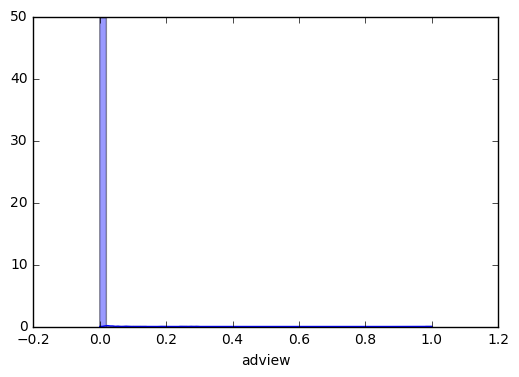

In [52]:
%matplotlib inline
sns.distplot(d2['adview'])
plt.show()

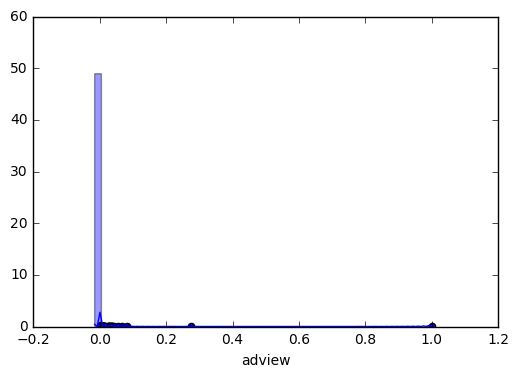

In [53]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

plt.scatter(y_test,predictions)


sns.distplot((y_test-predictions),bins=50);

In [54]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('RMSE:', 0.014931116337008797)


## Cross Validation

In [55]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
results=cross_val_score(lm_model, X, Y, cv=10)
print(results.mean())

-0.03236096477371414


## Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
# Create a random forest Regressor
RFR = RandomForestRegressor(n_estimators=500, random_state=0, n_jobs=-1)

# Train the classifier
RF_model=RFR.fit(X_train, y_train)

In [58]:
prediction_RFR = RFR.predict(X_test)


In [59]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_RFR)))

('RMSE:', 0.015166752221553606)


In [60]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
results=cross_val_score(RF_model, X, Y, cv=10)
print(results.mean())

-3.1924544902539855


#### using decision tree model for prediction as its rmse value is lowest among all the models.

In [61]:
d7.head(5)

,views,likes,dislikes,comment,duration,category
0,0.001955,0.019224,0.006052,0.016152,0.299797,0.142857
1,0.004620,0.025529,0.009438,0.012282,0.259284,0.714286
2,0.000640,0.001409,0.000944,0.000540,0.189061,0.428571
3,0.005848,0.007136,0.006940,0.003214,0.398379,0.857143
4,0.008408,0.007870,0.006246,0.001361,0.123565,0.142857


In [62]:
missing_val1=pd.DataFrame(d7.isnull().sum())
missing_val1

,0
views,0
likes,0
dislikes,0
comment,0
duration,0
category,0


In [63]:
#apply model on the test data
prediction_DT=fit.predict(d7.iloc[:,0:6])
d7['adview']=pd.DataFrame(prediction_DT)

In [64]:
d7.head(5)

,views,likes,dislikes,comment,duration,category,adview
0,0.001955,0.019224,0.006052,0.016152,0.299797,0.142857,0.000203
1,0.004620,0.025529,0.009438,0.012282,0.259284,0.714286,0.000203
2,0.000640,0.001409,0.000944,0.000540,0.189061,0.428571,0.000203
3,0.005848,0.007136,0.006940,0.003214,0.398379,0.857143,0.000203
4,0.008408,0.007870,0.006246,0.001361,0.123565,0.142857,0.000203


In [65]:
d7=d7.drop(['views','likes','dislikes','comment','duration','category'],axis=1)

In [66]:
d7['vidid']=df1['vidid']

In [67]:
d7=d7[['vidid','adview']]

In [68]:
d7['adview'].value_counts()

2.031301e-04    8308
5.525204e-07     213
1.481587e-03     181
4.907633e-02      62
Name: adview, dtype: int64

In [69]:
d7.to_csv("subbmission.csv", index = False)